# Quantum Computing Midterm Exam

## Problems 4, 5, 6

Problems 4, 5, and 6 from the midterm are to be completed in this notebook and uploaded to Canvas.

### Installations and Imports

In [1]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet
%pip install qiskit-aer --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.9 MB/s eta 0:00:00


In [2]:
#Installing/upgrading pylatexenc seems to have fixed my mpl issue
#If you try this and it doesn't work, try also restarting the runtime/kernel
%pip install pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
#Let's go ahead and import all this stuff too
import qiskit
#I know some of these are redundant. It makes the typing easier.
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector, plot_bloch_vector

In [4]:
from datetime import date, datetime
print(datetime.now())

2023-10-03 21:17:47.663817


In [5]:
from qiskit.circuit.library import QFT

def built_in_qft(qc, qubits, n):

    gate=QFT(num_qubits=n, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=False, name='qft')
    qc.append(gate, qubits)

    return qc

def built_in_iqft(qc, qubits, n):

    gate=QFT(num_qubits=n, approximation_degree=0, do_swaps=True, inverse=True, insert_barriers=False, name='iqft')
    qc.append(gate, qubits)

    return qc

In [6]:
#recursive CCC..CC Z^a
#control registers Cr must be an array or list
#target register is Tr
def recCZa(qc,a,Cr,Tr):
    if len(Cr)<=1:
        if len(Cr)==1:          #if only 1 control bit, apply the C-gate
            qc.cu1(np.pi*a,Cr[0],Tr)
        else:                   #if no control bits, just apply the gate
            qc.u1(np.pi*a,Tr)
    else:
        nn=len(Cr)
        #apply C-sqrt(U)
        recCZa(qc,a/2,[Cr[nn-1]],Tr)

        #recursively apply CCNot
        qc.h(Cr[nn-1])
        recCZa(qc,1,Cr[0:nn-1],Cr[nn-1])
        qc.h(Cr[nn-1])

        #apply C-sqrt(U dg)
        recCZa(qc,-a/2,[Cr[nn-1]],Tr)

        #recursively apply CCNot
        qc.h(Cr[nn-1])
        recCZa(qc,1,Cr[0:nn-1],Cr[nn-1])
        qc.h(Cr[nn-1])

        #recursivle apply CC-sqrt(U)
        recCZa(qc,a/2,Cr[0:nn-1],Tr)

def recTof(qc,Cr,Tr):
#Toffoli gate using recursive CZa
    qc.h(Tr)
    recCZa(qc,1,Cr,Tr)
    qc.h(Tr)

Not as effective with digital tests or when we don't all take the test together in person

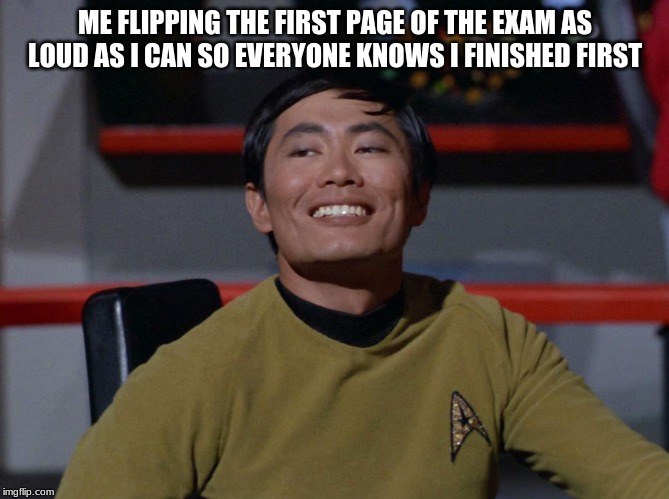

Answering all of question 2 like

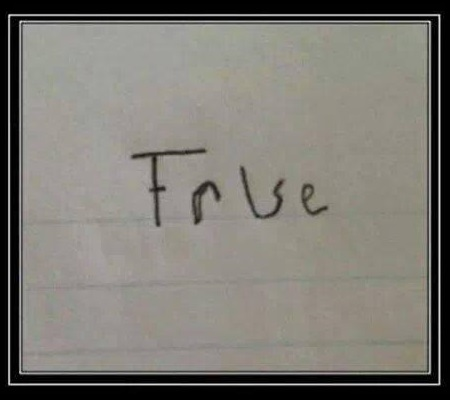

# Problem 4

The quantum oracle
$$\begin{equation*}
\mathbf{U}_g = \mathbf{C}_{10} \mathbf{X}_0
\end{equation*}$$

implements the 1-bit Boolean function $g(x) = 1-x$.  In other words,

$$\begin{equation*}
\mathbf{U}_g \lvert x\rangle \lvert y\rangle = \lvert x\rangle \lvert y \oplus (1-x)\rangle
\end{equation*}
$$

(a) Write a function to implement $\mathbf{U}_g$.

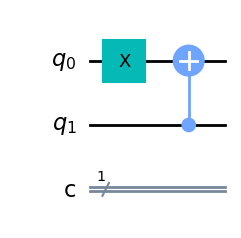

In [16]:
def U_g(qc):
    ## Put your code
    qc.x(0)
    qc.cx(1,0)
    ## between these comments
    return qc

qc = QuantumCircuit(2,1)
U_g(qc)
qc.draw('mpl')

(b) Using your function, implement Deutsch's algorithm for $\mathbf{U}_f$. Use Qiskit to draw the circuit.

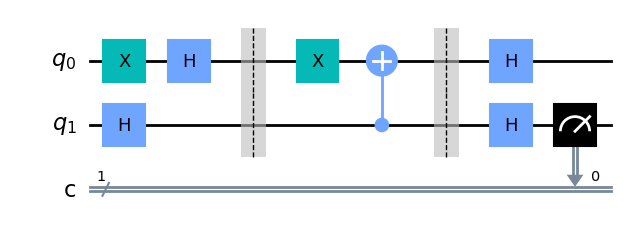

In [18]:
partb = QuantumCircuit(2,1)
partb.x(0)
for i in range(2):
  partb.h(i)
partb.barrier()
U_g(partb)
partb.barrier()
for i in range(2):
  partb.h(i)
partb.measure(1,0)
partb.draw('mpl')

{'1': 1024}


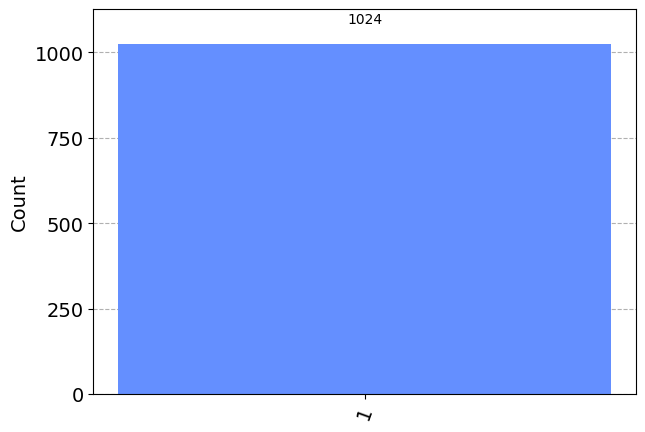

In [19]:
counts = execute(partb, backend = Aer.get_backend('qasm_simulator'), shots=1024).result().get_counts(partb)
print(counts)
plot_histogram(counts)

(c) What result is obtained upon measuring the input register, and what does it mean?

**The result obtained is 1, which indicates that the function is balanced. It should be noted that a balanced function produces 0 half of the time and 1 the other half of the time (depending on input value x).**

# Problem 5

Consider a classical Boolean function $f$ on $n$ bits defined by

$$f(x_0, \ldots, x_{n-1}) = \bigoplus_{i=0}^{n-1} \Bigl[ r_i (1-x_i) \oplus (1-r_i) x_i \Bigr] \; ,$$

where $\oplus$ is modulo-2 addition and $r_0, \ldots, r_{n-1}$ are $n$ classical bit values.

Design a quantum oracle $\mathbf{U}_f$ such that
$$\mathbf{U}_f \lvert x_{n-1} \ldots x_0\rangle \lvert y\rangle = \lvert x_{n-1} \ldots x_0\rangle \lvert y \oplus f(x_0, \ldots, x_{n-1})\rangle
$$

Implement your oracle as a function called "oracle" in the cell below.

In the cells below your answer we have included some functions you may use to test your answer.

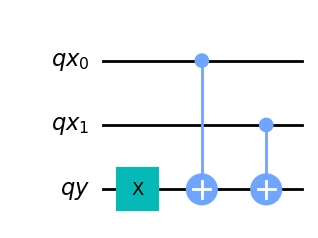

In [219]:
def oracle(qc, qx, qy, r):
    # qc is a quantum circuit consisting of two quantum registers: qx, qy
    # qx = [qx[0], ..., qx[n-1]] is a quantum register with n qubits
    # qy = qy[0] is a quantum register with one qubit
    # r = [r[0], ..., r[n-1]] is a classical register with n bits
    n = len(qx)

# Put your code

    # first I implement the Boolean function. if ri and xi are same, you get 0,
    # if not you get 1

    #r = 1###3
      # x = 0, func 1
      # x = 1, func 0
    # r = 0
      # x = 0, func 0
      # x = 1, func 1


    for i in range(n):
      if r[i] == 0:
        qc.cx(qx[i], qy)
      elif r[i] == 1:
        #qc.x(qx[i])
        qc.x(qy)
        qc.cx(qx[i], qy)
        #qc.x(qx[i])




# between these comments
    return qc


qx=QuantumRegister(2,name='qx')
qy=QuantumRegister(1,name='qy')
qc=QuantumCircuit(qx,qy)

oracle(qc,qx,qy,[1,0])

qc.draw('mpl')

In [121]:
def makeIntegerCircuit(n, x, m=0, y=None, p=0, z=None, nocbits=False):

    # define base quantum and classical registers
    q = qiskit.QuantumRegister(n+m+p)
    if nocbits:
        c = qiskit.ClassicalRegister(1)
    else:
        c = qiskit.ClassicalRegister(n+m+p)
    qc = qiskit.QuantumCircuit(q, c)

    # turn base quantum registers into separate lists
    if (y is None) and (z is None):
        qx = [q[i] for i in range(n)]
    elif (z is None):
        qy = [q[i] for i in range(m)]
        qx = [q[i] for i in range(m,m+n)]
    else:
        qz = [q[i] for i in range(p)]
        qy = [q[i] for i in range(p,p+m)]
        qx = [q[i] for i in range(p+m,p+m+n)]

    # encode integers into quantum registers
    bits = np.binary_repr(x, width=n)
    for i in range(n):
        if bits[n-1-i] == '1':
            qc.x(qx[i])
    if y is not None:
        bits = np.binary_repr(y, width=m)
        for i in range(m):
            if bits[m-1-i] == '1':
                qc.x(qy[i])
    if z is not None:
        bits = np.binary_repr(z, width=p)
        for i in range(p):
            if bits[p-1-i] == '1':
                qc.x(qz[i])

    # return final circuit and registers
    if (y is None) and (z is None):
        return qc, c, qx
    elif (z is None):
        return qc, c, qx, qy
    else:
        return qc, c, qx, qy, qz

In [120]:
def measureCircuit(qc, c, qx, qy=None, qz=None):

    # determine number of qubits in each register
    n = len(qx)
    if qy is not None:
        m = len(qy)
    else:
        m = 0
    if qz is not None:
        p = len(qz)
    else:
        p = 0

    # apply measurement gates
    if (qy is None) and (qz is None):
        for i in range(n):
            qc.measure(qx[i], c[i])
    elif (qz is None):
        for j in range(m):
            qc.measure(qy[j], c[j])
        for i in range(n):
            qc.measure(qx[i], c[m+i])
    else:
        for k in range(p):
            qc.measure(qz[k], c[k])
        for j in range(m):
            qc.measure(qy[j], c[p+j])
        for i in range(n):
            qc.measure(qx[i], c[p+m+i])

    # execute quantum circuit
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    result = job.result()
    data = result.get_counts(qc)

    # extract the integer values of the input register, x, and output register, y
    out = list(data.keys())[0]
    z = 0
    for k in range(p):
        if out[n+m+p-1-k] == '1':
            z += 2**k
    y = 0
    for j in range(p,p+m):
        if out[n+m+p-1-j] == '1':
            y += 2**(j-p)
    x = 0
    for i in range(p+m,p+m+n):
        if out[n+m+p-1-i] == '1':
            x += 2**(i-m-p)

    if (qy is None) and (qz is None):
        return x
    elif (qz is None):
        return x, y
    else:
        return x, y, z

In [217]:
def test(fun):
    K = 10 # number of trials
    result = 'Success!'
    for k in range(K):

        # choose random parameter values
        n = np.random.randint(1,5)
        r = [np.random.randint(0,2) for i in range(n)]
        x = np.random.randint(0,2**n)
        y = np.random.randint(0,2)

        # apply the algorithm
        qc, c, qx, qy = makeIntegerCircuit(n, x, 1, y)
        fun(qc, qx, qy, r)
        x_out, y_out = measureCircuit(qc, c, qx, qy)

        # compute the correct output
        for i in range(n):
            xi = x//2**i % 2
            y = ( y + ( r[i]*(1-xi) + (1-r[i])*xi ) % 2 ) % 2

        if not(x_out == x and y_out == y):
            result = 'Failure'
            break

    print(result)

In [220]:
# Run this cell to test your oracle.
test(oracle)


Success!


# Problem 6

Given the Boolean function $f(x_1, x_2) = x_1 \bar{x}_2 = x_1 (1-x_2)$,

(a) What are the solutions to the equation $f(x_1,x_2) = 1$?

**x1=1 and x2=0 is the only solution**

(b) Define a function to implement the quantum oracle $\mathbf{U}_f$ such that $\mathbf{U}_f \lvert x_2 x_1\rangle\lvert x_0\rangle = \lvert x_2 x_1\rangle \lvert x_0  \oplus f(x_1,x_2)\rangle$.

In [108]:
# this is the correct oracle because we only want our function to activate when
# x1 = 1 and x2 = 0
def U_f(qc):
    ## Put your code
    qc.x(2)
    qc.mcx([1,2], 0)
    qc.x(2)
    ## between these comments
    return qc

qc = QuantumCircuit(3)
U_f(qc)
qc.draw()

┌───┐     
q_0: ─────┤ X ├─────
          └─┬─┘     
q_1: ───────■───────
     ┌───┐  │  ┌───┐
q_2: ┤ X ├──■──┤ X ├
     └───┘     └───┘

(c) How many oracle calls are needed for Grover's algorithm?

**one call is needed, since R= floor(pi*sqrtN /4) where N is the number of input qubits**

In [95]:
R = 1

(d) Implement Grover's algorithm for this oracle and use Qiskit to draw the circuit.

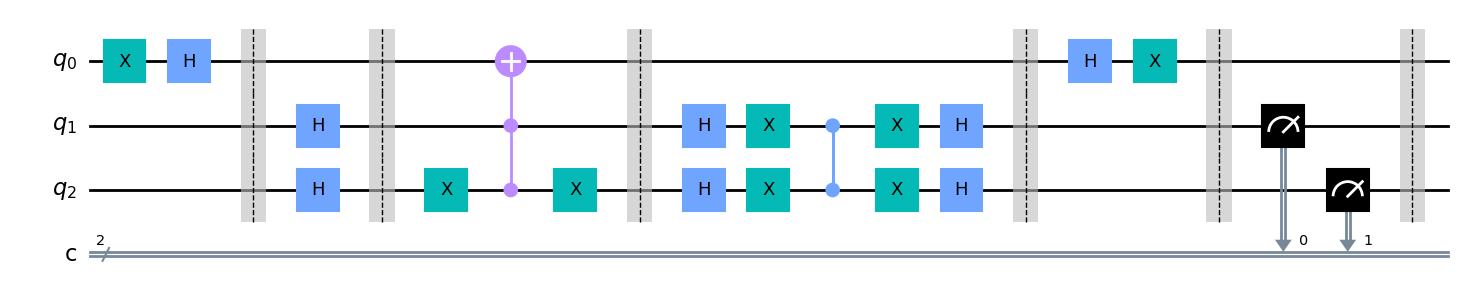

In [109]:
prob6d = QuantumCircuit(3,2)
prob6d.x(0)
prob6d.h(0)
prob6d.barrier()
prob6d.h(1)
prob6d.h(2)
prob6d.barrier()
for i in range(R):
  U_f(prob6d)
  prob6d.barrier()
  # apply W, hardcoded for ease
  prob6d.h(1)
  prob6d.x(1)
  prob6d.h(2)
  prob6d.x(2)

  prob6d.cz(2,1)

  prob6d.x(1)
  prob6d.h(1)
  prob6d.x(2)
  prob6d.h(2)
prob6d.barrier()
prob6d.h(0)
prob6d.x(0)
prob6d.barrier()
prob6d.measure(1,0)
prob6d.measure(2,1)
prob6d.barrier()
prob6d.draw('mpl')

{'01': 1024}


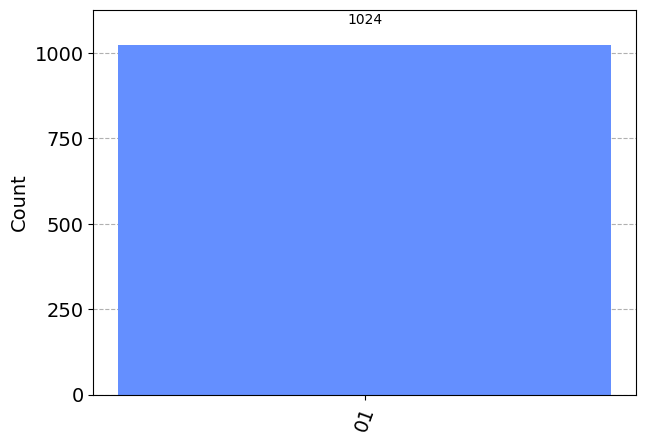

In [111]:
counts = execute(prob6d, backend = Aer.get_backend('qasm_simulator'), shots=1024).result().get_counts(prob6d)
print(counts)
plot_histogram(counts)